In [180]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error,mean_absolute_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet,LogisticRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, precision_score,  recall_score 
from sklearn.metrics import f1_score, classification_report, roc_curve,  auc, precision_recall_curve 
from sklearn.metrics import average_precision_score

In [101]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [102]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [104]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [105]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis =1,inplace = True)

In [106]:
cat_columns = df.select_dtypes(exclude = np.number).columns

In [107]:
cat_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [108]:
encode_df  = pd.DataFrame(index=df.index)

In [109]:
encode_df = pd.get_dummies(df[cat_columns[1:]])

In [110]:
encode_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [111]:
df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis = 1, inplace = True)

In [112]:
dff = pd.concat([df,encode_df], axis =1)

In [113]:
dff

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,No,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,Yes,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,No,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,No,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,41,4,2,4,...,0,0,0,0,0,0,1,0,1,0
1466,39,No,613,6,1,4,42,2,3,1,...,0,0,0,0,0,0,1,0,1,0
1467,27,No,155,4,3,2,87,4,2,2,...,1,0,0,0,0,0,1,0,0,1
1468,49,No,1023,2,3,4,63,2,2,2,...,0,0,0,1,0,0,1,0,1,0


In [114]:
dff["Attrition"] = dff["Attrition"].replace({"Yes":1,"No":0})

In [115]:
dff

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,0,0,0,0,0,0,1,0,1,0
1466,39,0,613,6,1,4,42,2,3,1,...,0,0,0,0,0,0,1,0,1,0
1467,27,0,155,4,3,2,87,4,2,2,...,1,0,0,0,0,0,1,0,0,1
1468,49,0,1023,2,3,4,63,2,2,2,...,0,0,0,1,0,0,1,0,1,0


In [116]:
dff_c = dff.columns

In [117]:
dff_c = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']

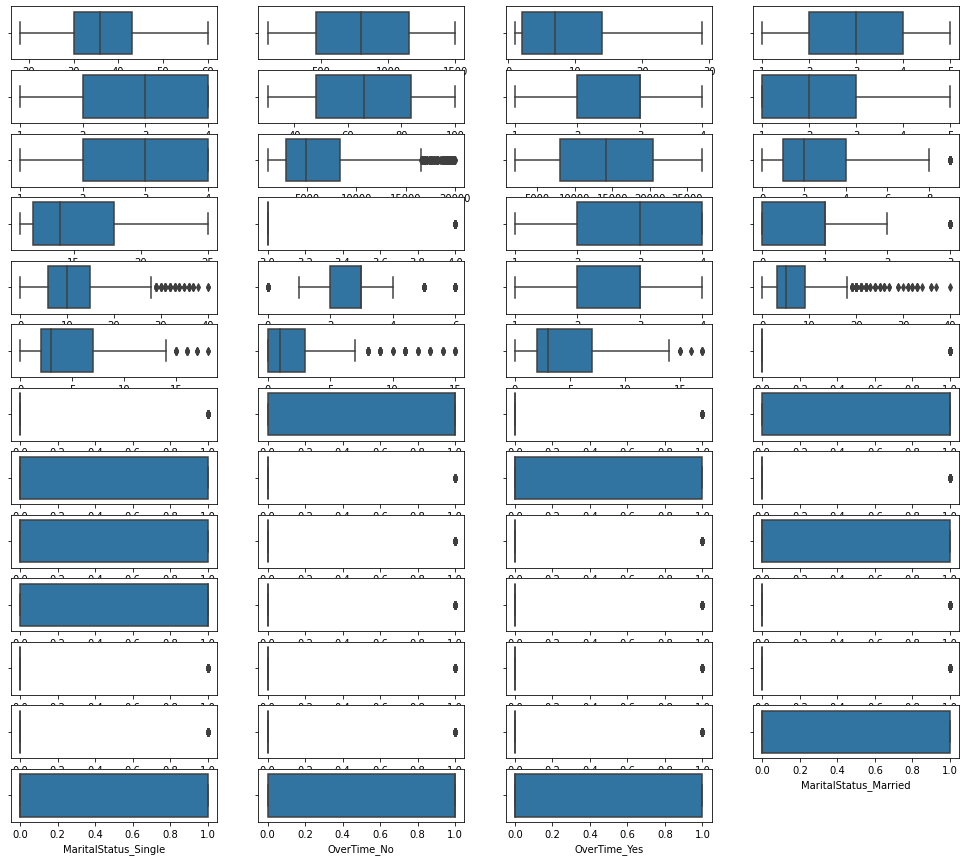

In [118]:
t=1
plt.figure(figsize = (17,15))
for i in dff_c:
    plt.subplot(13,4,t)
    sns.boxplot(dff[i])
    t+=1
plt.show() 

In [119]:
for i in dff_c:
    q1,q3 = np.quantile(dff[i],[0.25,0.75])
    iqr = q3 - q1
    ub = q3 + (1.5 * iqr)
    lb = q1 - (1.5 * iqr)
    dff[i] = np.where(dff[i] > ub, ub, dff[i])
    dff[i] = np.where(dff[i] < lb, lb, dff[i])

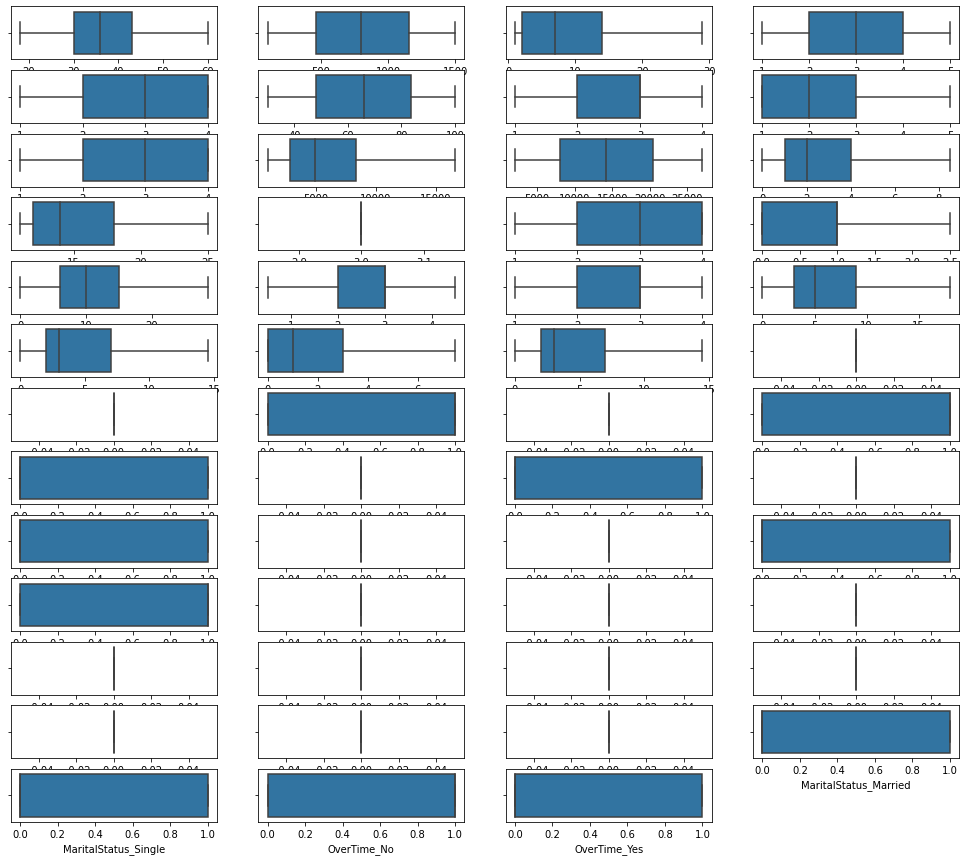

In [120]:
t=1
plt.figure(figsize = (17,15))
for i in dff_c:
    plt.subplot(13,4,t)
    sns.boxplot(dff[i])
    t+=1
plt.show() 

In [121]:
X = dff.drop('Attrition', axis =1)
y = dff['Attrition']

In [122]:
sc = StandardScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [123]:
X_scaled


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.084766,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.918921,1.458650,-1.591746,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.283072,...,0.0,0.0,0.0,0.0,0.0,0.0,1.088232,-0.685565,0.628241,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.981623,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.918921,1.458650,-1.591746,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.793428,...,0.0,0.0,0.0,0.0,0.0,0.0,1.088232,-0.685565,-1.591746,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.664977,...,0.0,0.0,0.0,0.0,0.0,0.0,1.088232,-0.685565,0.628241,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.871096,...,0.0,0.0,0.0,0.0,0.0,0.0,1.088232,-0.685565,0.628241,-0.628241
1466,0.227347,-0.469754,-0.393938,-1.868426,1.169781,-1.175601,-1.026167,0.845911,-1.567907,0.833920,...,0.0,0.0,0.0,0.0,0.0,0.0,1.088232,-0.685565,0.628241,-0.628241
1467,-1.086676,-1.605183,-0.640727,0.085049,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-0.050528,...,0.0,0.0,0.0,0.0,0.0,0.0,1.088232,-0.685565,-1.591746,1.591746
1468,1.322365,0.546677,-0.887515,0.085049,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.223328,...,0.0,0.0,0.0,0.0,0.0,0.0,1.088232,-0.685565,0.628241,-0.628241


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

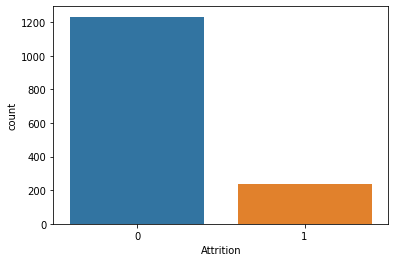

In [125]:
sns.countplot(dff.Attrition)

In [126]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_scaled, y = smote.fit_resample(X_scaled, y)

dff = pd.concat([pd.DataFrame(X_scaled), pd.DataFrame(y)], axis=1)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

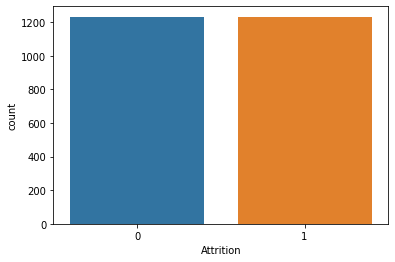

In [127]:
sns.countplot(dff.Attrition)

In [128]:
def get_test_report(model, test_data):
    test_pred = model.predict(test_data)
    return(classification_report(y_test, test_pred))

In [129]:
def get_train_report(model, train_data):
    train_pred = model.predict(train_data)
    return(classification_report(y_train, train_pred))

In [130]:
def plot_confusion_matrix(model, test_data):
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [131]:
def plot_roc(model, test_data):
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [132]:
Base_model=LogisticRegression()
Base_model.fit(X_train,y_train)

LogisticRegression()

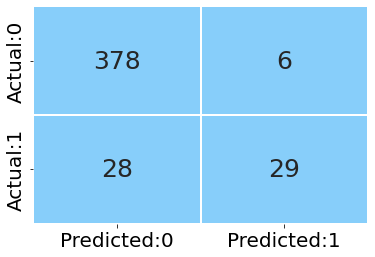

In [133]:
plot_confusion_matrix(Base_model, test_data = X_test)

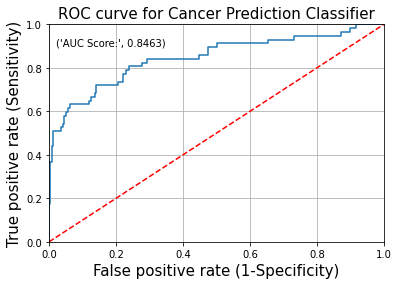

In [134]:
plot_roc(Base_model, test_data = X_test)

In [135]:
test_report = get_test_report(Base_model, test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       384
           1       0.83      0.51      0.63        57

    accuracy                           0.92       441
   macro avg       0.88      0.75      0.79       441
weighted avg       0.92      0.92      0.91       441



In [136]:
print('Classification Report for train set: \n', get_train_report(Base_model, train_data = X_train))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       849
           1       0.77      0.39      0.52       180

    accuracy                           0.87      1029
   macro avg       0.83      0.68      0.72      1029
weighted avg       0.86      0.87      0.86      1029



In [137]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

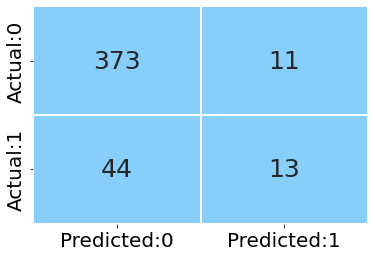

In [138]:
plot_confusion_matrix(knn_model, test_data = X_test)

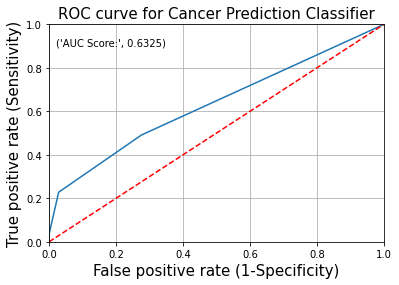

In [139]:
plot_roc(knn_model, test_data = X_test)

In [150]:
train_report = get_train_report(knn_model, train_data = X_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       849
           1       0.74      0.39      0.51       180

    accuracy                           0.87      1029
   macro avg       0.81      0.68      0.72      1029
weighted avg       0.86      0.87      0.85      1029



In [151]:
test_report = get_test_report(knn_model, test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       384
           1       0.54      0.23      0.32        57

    accuracy                           0.88       441
   macro avg       0.72      0.60      0.63       441
weighted avg       0.85      0.88      0.85       441



### GaussianNB 

In [152]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

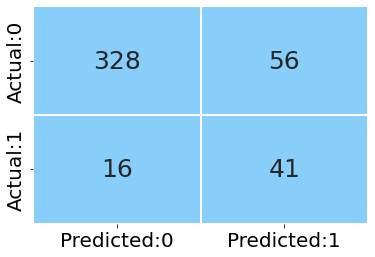

In [153]:
plot_confusion_matrix(gnb_model, test_data=X_test)

In [154]:
train_report = get_train_report(gnb_model, train_data=X_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       849
           1       0.42      0.65      0.51       180

    accuracy                           0.78      1029
   macro avg       0.67      0.73      0.69      1029
weighted avg       0.83      0.78      0.80      1029



In [155]:
test_report = get_test_report(gnb_model, test_data=X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       384
           1       0.42      0.72      0.53        57

    accuracy                           0.84       441
   macro avg       0.69      0.79      0.72       441
weighted avg       0.88      0.84      0.85       441



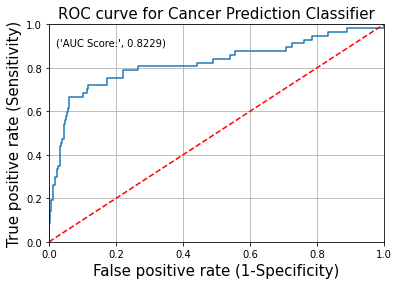

In [156]:
plot_roc(gnb_model, test_data=X_test)

### Decision Tree Classification

In [157]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [158]:
train_report = get_train_report(decision_tree, train_data=X_train)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       849
           1       1.00      1.00      1.00       180

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



In [159]:
test_report = get_test_report(decision_tree, test_data=X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       384
           1       0.35      0.40      0.37        57

    accuracy                           0.83       441
   macro avg       0.63      0.65      0.64       441
weighted avg       0.84      0.83      0.83       441



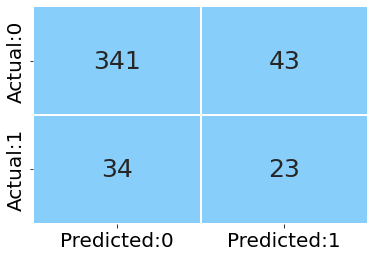

In [160]:
plot_confusion_matrix(decision_tree, test_data = X_test)

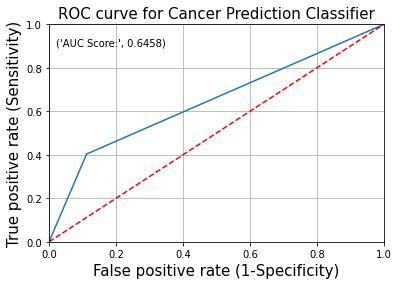

In [161]:
plot_roc(decision_tree, test_data=X_test)

In [162]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)
decision_tree = dt_model.fit(X_train, y_train)
train_report = get_train_report(decision_tree, train_data=X_train)
print('Train data:\n', train_report)
test_report = get_test_report(decision_tree, test_data=X_test)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       849
           1       0.69      0.32      0.44       180

    accuracy                           0.86      1029
   macro avg       0.78      0.65      0.68      1029
weighted avg       0.84      0.86      0.83      1029

Test data:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       384
           1       0.52      0.28      0.36        57

    accuracy                           0.87       441
   macro avg       0.71      0.62      0.65       441
weighted avg       0.85      0.87      0.86       441



### Random Forest classification

In [163]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

In [164]:
train_report = get_train_report(rf_model,train_data = X_train)
print(train_report) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       849
           1       0.99      0.89      0.94       180

    accuracy                           0.98      1029
   macro avg       0.99      0.94      0.96      1029
weighted avg       0.98      0.98      0.98      1029



In [165]:
test_report = get_test_report(rf_model, test_data = X_test)
print(test_report) 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       384
           1       0.71      0.26      0.38        57

    accuracy                           0.89       441
   macro avg       0.81      0.62      0.66       441
weighted avg       0.88      0.89      0.87       441



### XGB Classification Grid Search CV

In [174]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3} 



In [175]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))
xgb_model = xgb_grid_model.fit(X_train, y_train)
print('Classification Report for test set:\n', get_test_report(xgb_model,test_data = X_test))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       384
           1       0.75      0.26      0.39        57

    accuracy                           0.89       441
   macro avg       0.83      0.63      0.67       441
weighted avg       0.88      0.89      0.87       441



In [176]:
print('Classification Report for Train set:\n', get_train_report(xgb_model,train_data = X_train))

Classification Report for Train set:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       849
           1       0.96      0.64      0.77       180

    accuracy                           0.93      1029
   macro avg       0.94      0.82      0.86      1029
weighted avg       0.93      0.93      0.93      1029



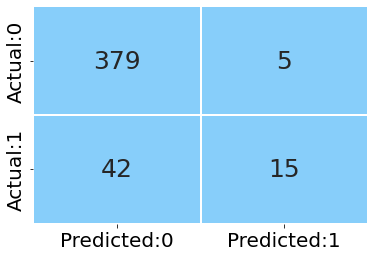

In [177]:
plot_confusion_matrix(xgb_grid_model, test_data=X_test)

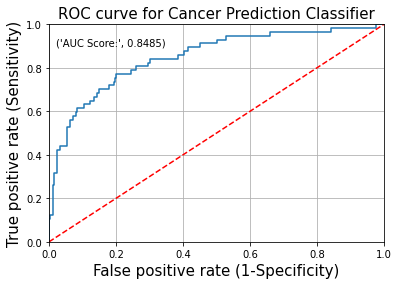

In [178]:
plot_roc(xgb_model,test_data = X_test)

In [179]:
# KNN and XGBosst with hyperparameter tunning is performing well 